In [47]:
!wget https://github.com/Bao02Harry/Recognize_Rock_Paper_Scissors_Application/blob/main/SmallRPSDataset-master.zip?raw=true

--2022-05-28 08:49:25--  https://github.com/Bao02Harry/Recognize_Rock_Paper_Scissors_Application/blob/main/SmallRPSDataset-master.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Bao02Harry/Recognize_Rock_Paper_Scissors_Application/raw/main/SmallRPSDataset-master.zip [following]
--2022-05-28 08:49:25--  https://github.com/Bao02Harry/Recognize_Rock_Paper_Scissors_Application/raw/main/SmallRPSDataset-master.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Bao02Harry/Recognize_Rock_Paper_Scissors_Application/main/SmallRPSDataset-master.zip [following]
--2022-05-28 08:49:25--  https://raw.githubusercontent.com/Bao02Harry/Recognize_Rock_Paper_Scissors_Application/main/SmallRPSDataset-master.zip
Resolving raw.githubusercontent.com (raw.g

In [62]:
!wget https://github.com/Bao02Harry/Second_Rock_Paper_Scissor_Data/blob/main/Data.zip?raw=true

--2022-05-28 09:16:38--  https://github.com/Bao02Harry/Second_Rock_Paper_Scissor_Data/blob/main/Data.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Bao02Harry/Second_Rock_Paper_Scissor_Data/raw/main/Data.zip [following]
--2022-05-28 09:16:39--  https://github.com/Bao02Harry/Second_Rock_Paper_Scissor_Data/raw/main/Data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Bao02Harry/Second_Rock_Paper_Scissor_Data/main/Data.zip [following]
--2022-05-28 09:16:39--  https://raw.githubusercontent.com/Bao02Harry/Second_Rock_Paper_Scissor_Data/main/Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [48]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mplimg

In [49]:
import zipfile
local_zip = './SmallRPSDataset-master.zip?raw=true'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./SmallRPSDataset-master')
zip_ref.close()

In [50]:
# Directory with our training rock picture
train_rock_dir = os.path.join("./SmallRPSDataset-master/SmallRPSDataset-master/rock")
# Directory with our training paper picture
train_paper_dir = os.path.join("./SmallRPSDataset-master/SmallRPSDataset-master/paper")
# Directory with our training scissors picture
train_scissors_dir = os.path.join("./SmallRPSDataset-master/SmallRPSDataset-master/scissors")

In [51]:
train_rock_names = os.listdir(train_rock_dir)
train_paper_names = os.listdir(train_paper_dir)
train_scissors_names = os.listdir(train_scissors_dir)

In [52]:
print(len(train_rock_names))
print(len(train_paper_names))
print(len(train_scissors_names))

365
365
365


In [75]:
# Build model
model= tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', input_shape = (300, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # This is the second convolution
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # This is the third convolution 
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # This is the forth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # This is the fifth convolution convolution
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.05),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horse) and 1 for the orther('humans')
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 198, 512)     14336     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 99, 512)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 97, 256)      1179904   
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 73, 48, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 46, 128)       295040    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 35, 23, 128)     

In [55]:
# All images will be rescaled by 1/255
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './SmallRPSDataset-master/SmallRPSDataset-master/', # This is the source directory for training images
    target_size= (300, 200), # All images will be resized to 300x300
    batch_size = 32
)


Found 1095 images belonging to 3 classes.


In [63]:
import zipfile
local_zip = './Data.zip?raw=true'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./Data')
zip_ref.close()

In [65]:
# Data validation
# All images will be rescaled by 1/255
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

# Flow training images in batches of 128 using train_datagen generator
test_generator = test_data.flow_from_directory(
    './Data/Data/', # This is the source directory for training images
    target_size= (300, 200), # All images will be resized to 300x300
    batch_size = 32
)


Found 372 images belonging to 3 classes.


In [56]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') >= 0.99):
      print("\nAccuracy is larger than 0.98 so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()


In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

In [72]:
sum_batch = len(train_rock_names) + len(train_paper_names) + len(train_scissors_names)

In [77]:
seed = 20
np.random.seed(seed)
history = model.fit(train_generator, validation_data = test_generator, steps_per_epoch= (sum_batch/32),  epochs=50, callbacks =[callbacks])

Epoch 1/50
34/34 [==============================] - 27s 771ms/step - loss: 1.0435 - accuracy: 0.4858 - val_loss: 1.2272 - val_accuracy: 0.2769
Epoch 2/50
34/34 [==============================] - 27s 781ms/step - loss: 0.5910 - accuracy: 0.7580 - val_loss: 1.2812 - val_accuracy: 0.2204
Epoch 3/50
34/34 [==============================] - 26s 769ms/step - loss: 0.4015 - accuracy: 0.8237 - val_loss: 1.9647 - val_accuracy: 0.3333
Epoch 4/50
34/34 [==============================] - 26s 767ms/step - loss: 0.3300 - accuracy: 0.8521 - val_loss: 1.9863 - val_accuracy: 0.3414
Epoch 5/50
34/34 [==============================] - 26s 770ms/step - loss: 0.2630 - accuracy: 0.8858 - val_loss: 1.4635 - val_accuracy: 0.2339
Epoch 6/50
34/34 [==============================] - 26s 772ms/step - loss: 0.2420 - accuracy: 0.9059 - val_loss: 1.6957 - val_accuracy: 0.3145
Epoch 7/50
34/34 [==============================] - 26s 770ms/step - loss: 0.2270 - accuracy: 0.8995 - val_loss: 1.6118 - val_accuracy: 0.2500

In [60]:
tf.keras.models.save_model(model, filepath = '/content/model_C.h5')

range(0, 24)


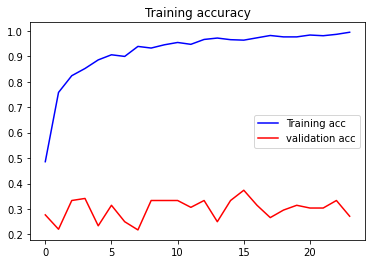

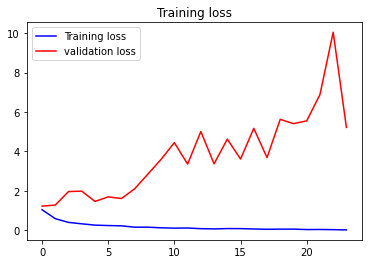

In [78]:
#check accuracy, loss graph
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(len(acc))
print(epochs)
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'validation acc')
plt.title("Training accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'validation loss')
plt.title("Training loss")
plt.legend()
plt.show()

In [41]:

from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
# uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 200))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  max_index_row = np.argmax(np.array(classes), axis=1)
  print(max_index_row)

Saving WIN_20220526_16_38_25_Pro.jpg to WIN_20220526_16_38_25_Pro (1).jpg
[[9.7304803e-01 2.6952017e-02 2.5728927e-08]]
[0]
